<a href="https://colab.research.google.com/github/vardhan2303A52384/Exp-AI/blob/main/Exp_ai_xam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Dataset_spine.csv")

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

First 5 rows of the dataset:
        Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  \
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal   
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal   
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal   
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal   
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal   

                                         Unnamed: 13  
0                                           

In [ ]:
# Remove rows with any missing values
df_drop_rows = df.dropna()
print("After removing rows with missing values:", df_drop_rows.shape)

# Remove columns with any missing values
df_drop_cols = df.dropna(axis=1)
print("After removing columns with missing values:", df_drop_cols.shape)

After removing rows with missing values: (14, 14)
After removing columns with missing values: (310, 13)


In [ ]:
# Create copies to avoid overwriting
df_mean = df.copy()
df_median = df.copy()
df_mode = df.copy()

# Mean imputation
df_mean.fillna(df_mean.mean(numeric_only=True), inplace=True)

# Median imputation
df_median.fillna(df_median.median(numeric_only=True), inplace=True)

# Mode imputation (applied column-wise)
for column in df_mode.columns:
    df_mode[column].fillna(df_mode[column].mode()[0], inplace=True)

print("Missing values after mean imputation:\n", df_mean.isnull().sum())

Missing values after mean imputation:
 Col1             0
Col2             0
Col3             0
Col4             0
Col5             0
Col6             0
Col7             0
Col8             0
Col9             0
Col10            0
Col11            0
Col12            0
Class_att        0
Unnamed: 13    296
dtype: int64


/tmp/ipython-input-3788712809.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mode[column].fillna(df_mode[column].mode()[0], inplace=True)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = scaler.fit_transform(df_minmax[numeric_cols])

print("After Min-Max Normalization:")
print(df_minmax.head())

After Min-Max Normalization:
       Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.355688  0.519900  0.229180  0.250857  0.307461  0.025148  0.744554   
1  0.124501  0.296783  0.098578  0.144629  0.476649  0.036365  0.413783   
2  0.411666  0.513932  0.322995  0.307661  0.386097  0.017523  0.473750   
3  0.416151  0.557414  0.271260  0.289436  0.341826  0.051838  0.367741   
4  0.227272  0.289479  0.128129  0.247022  0.409579  0.044173  0.542524   

       Col8      Col9     Col10     Col11     Col12 Class_att  \
0  0.186396  0.610506  0.845115  0.156861  0.977797  Abnormal   
1  0.197208  0.854170  0.996300  0.230878  0.243812  Abnormal   
2  0.666533  0.850409  0.983442  0.148026  0.327166  Abnormal   
3  0.556360  0.461461  0.448790  0.113989  0.316741  Abnormal   
4  0.957940  0.725757  0.188118  0.447450  0.479711  Abnormal   

                                         Unnamed: 13  
0                                                NaN  
1                  

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_zscore = df.copy()
df_zscore[numeric_cols] = scaler.fit_transform(df_zscore[numeric_cols])

print("After Z-Score Normalization:")
print(df_zscore.head())

After Z-Score Normalization:
       Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.147086  0.501369 -0.665177 -0.184950 -1.447647 -0.708059  0.951630   
1 -1.245864 -0.748769 -1.453001 -1.041521 -0.264385 -0.579556 -0.202553   
2  0.484370  0.467932 -0.099262  0.273083 -0.897686 -0.795421  0.006694   
3  0.511390  0.711562 -0.411339  0.126128 -1.207303 -0.402288 -0.363213   
4 -0.626648 -0.789693 -1.274745 -0.215876 -0.733455 -0.490106  0.246670   

       Col8      Col9     Col10     Col11     Col12 Class_att  \
0 -1.015066  0.434293  1.167129 -1.196587  1.712368  Abnormal   
1 -0.977816  1.316291  1.679551 -0.940325 -0.913941  Abnormal   
2  0.639127  1.302680  1.635969 -1.227178 -0.615686  Abnormal   
3  0.259554 -0.105211 -0.176157 -1.345020 -0.652989  Abnormal   
4  1.643094  0.851472 -1.059666 -0.190502 -0.069858  Abnormal   

                                         Unnamed: 13  
0                                                NaN  
1                  

In [ ]:
df_drop_rows.to_csv("spine_no_nulls_rows.csv", index=False)
df_mean.to_csv("spine_mean_imputed.csv", index=False)
df_minmax.to_csv("spine_minmax_scaled.csv", index=False)
df_zscore.to_csv("spine_zscore_scaled.csv", index=False)

In [ ]:
import pandas as pd
from collections import Counter

# Load the dataset
df = pd.read_csv("/content/Dataset_spine.csv")

# Display class distribution
print("Class Distribution:")
print(Counter(df['Class_att']))   # replace 'class' with your actual target column name

Class Distribution:
Counter({'Abnormal': 210, 'Normal': 100})


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Separate features and target
X = df.drop(['Class_att', 'Unnamed: 13'], axis=1)   # Drop the target column and the 'Unnamed: 13' column
y = df['Class_att']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res_smote, y_res_smote = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_res_smote))

Before SMOTE: Counter({'Abnormal': 141, 'Normal': 76})
After SMOTE: Counter({'Normal': 141, 'Abnormal': 141})


In [ ]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN
ada = ADASYN(random_state=42)
X_res_adasyn, y_res_adasyn = ada.fit_resample(X_train, y_train)

print("Before ADASYN:", Counter(y_train))
print("After ADASYN:", Counter(y_res_adasyn))

Before ADASYN: Counter({'Abnormal': 141, 'Normal': 76})
After ADASYN: Counter({'Normal': 151, 'Abnormal': 141})


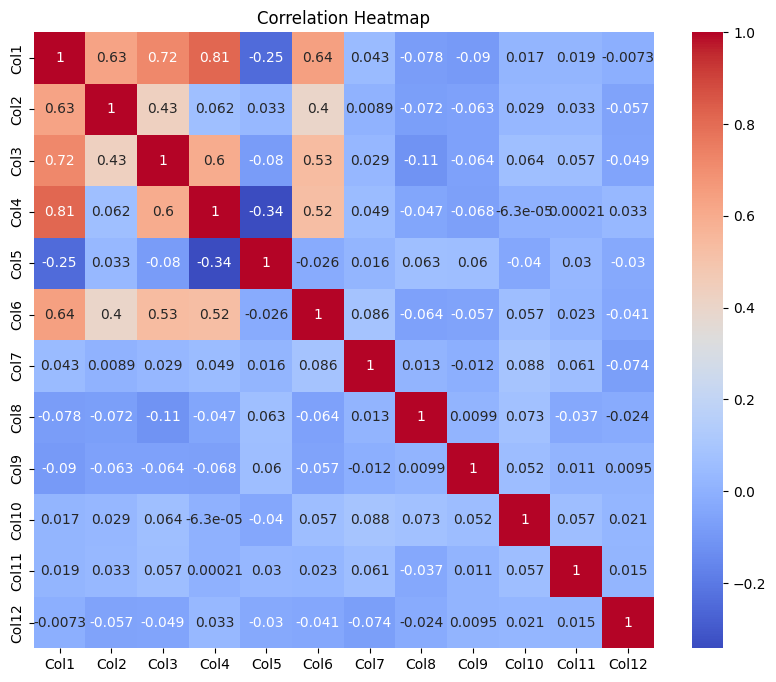

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric features
corr_matrix = df.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Identify highly correlated features
threshold = 0.85
corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)

print("Highly correlated features to remove:", corr_features)

# Drop those features
df_reduced = df.drop(columns=corr_features)

print("Shape before removing:", df.shape)
print("Shape after removing:", df_reduced.shape)

Highly correlated features to remove: set()
Shape before removing: (310, 14)
Shape after removing: (310, 14)


In [ ]:
X_res_smote.to_csv("spine_SMOTE_balanced.csv", index=False)
X_res_adasyn.to_csv("spine_ADASYN_balanced.csv", index=False)
df_reduced.to_csv("spine_correlation_reduced.csv", index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("/content/Dataset_spine.csv")

# Encode target column if categorical
le = LabelEncoder()
df['Class_att'] = le.fit_transform(df['Class_att'])  # replace 'class' if your target column has another name

# Separate features and target
X = df.drop('Class_att', axis=1)
y = df['Class_att']

# Split for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

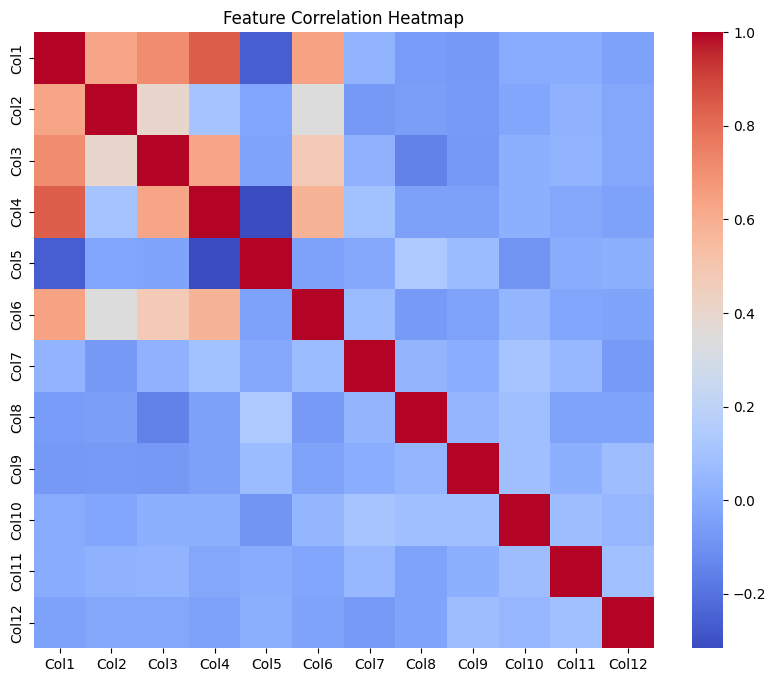

Highly correlated features to remove (Correlation Analysis): set()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'Unnamed: 13' column from X_train and X_test
X_train = X_train.drop(columns=['Unnamed: 13'])
X_test = X_test.drop(columns=['Unnamed: 13'])


# Compute correlation matrix
corr_matrix = X_train.corr()

# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Identify and remove highly correlated features (threshold = 0.85)
threshold = 0.85
corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            corr_features.add(corr_matrix.columns[i])

print("Highly correlated features to remove (Correlation Analysis):", corr_features)

X_train_corr = X_train.drop(columns=corr_features)
X_test_corr = X_test.drop(columns=corr_features)

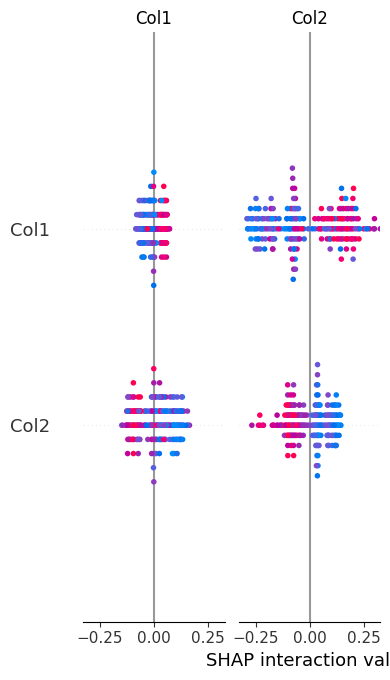

In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier

# Train a simple model (e.g., Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary for global feature importance (mean absolute SHAP values across all classes)
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=X_train.columns)

In [ ]:
import pandas as pd
import numpy as np

# Get mean absolute SHAP values per feature across all classes
if isinstance(shap_values, list):
    # Stack the SHAP value arrays for multi-class output
    stacked_shap_values = np.stack(shap_values, axis=0)
    # Calculate mean absolute SHAP values across samples (axis=1)
    intermediate_shap_importance_values = np.mean(np.abs(stacked_shap_values), axis=1) # This gives shape (n_classes, n_features)
    # Calculate mean across classes (axis=0) to get a 1D array of shape (n_features,)
    shap_importance_values = np.mean(intermediate_shap_importance_values, axis=0)
else:
    # Calculate mean absolute SHAP values across samples for single-class output
    shap_importance_values = np.mean(np.abs(shap_values), axis=0)

# Debugging: Print shapes and types
print("Shape of X_train.columns:", X_train.columns.shape)
print("Type of X_train.columns:", type(X_train.columns))
print("Shape of shap_importance_values:", shap_importance_values.shape)
print("Type of shap_importance_values:", type(shap_importance_values))

# Create DataFrame by assigning columns separately
shap_importance = pd.DataFrame({'Feature': X_train.columns})
# Ensure shap_importance_values is 1D before assignment by taking mean across the unexpected second dimension if present
if shap_importance_values.ndim > 1:
    shap_importance_values = np.mean(shap_importance_values, axis=1)

shap_importance['SHAP Importance'] = shap_importance_values

shap_importance = shap_importance.sort_values(by='SHAP Importance', ascending=False)

# Display top features
print("Top 10 SHAP Important Features:")
print(shap_importance.head(10))

# Select top 10 features for modeling
top_features = shap_importance['Feature'].head(10).values
X_train_shap = X_train[top_features]
X_test_shap = X_test[top_features]

Shape of X_train.columns: (12,)
Type of X_train.columns: <class 'pandas.core.indexes.base.Index'>
Shape of shap_importance_values: (12, 2)
Type of shap_importance_values: <class 'numpy.ndarray'>
Top 10 SHAP Important Features:
   Feature  SHAP Importance
5     Col6         0.180733
1     Col2         0.079733
4     Col5         0.060407
0     Col1         0.035177
2     Col3         0.033358
3     Col4         0.024580
8     Col9         0.014234
9    Col10         0.013447
11   Col12         0.013039
10   Col11         0.011486


In [ ]:
print("\n=== Feature Selection Comparison ===")
print(f"Correlation-based feature count: {X_train_corr.shape[1]}")
print(f"SHAP-based top feature count: {X_train_shap.shape[1]}")
print("\nFeatures removed by correlation analysis:", corr_features)
print("\nTop SHAP features:", list(top_features))


=== Feature Selection Comparison ===
Correlation-based feature count: 12
SHAP-based top feature count: 10

Features removed by correlation analysis: set()

Top SHAP features: ['Col6', 'Col2', 'Col5', 'Col1', 'Col3', 'Col4', 'Col9', 'Col10', 'Col12', 'Col11']


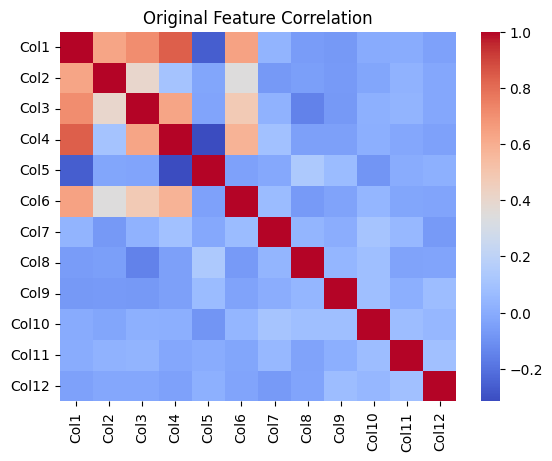

In [ ]:
sns.heatmap(X_train.corr(), cmap="coolwarm")
plt.title("Original Feature Correlation")
plt.show()

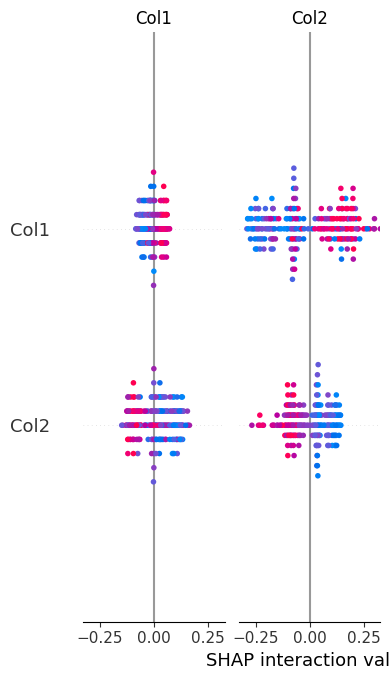

In [ ]:
# Plot SHAP summary for the second class (index 1)
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns, class_inds=1)

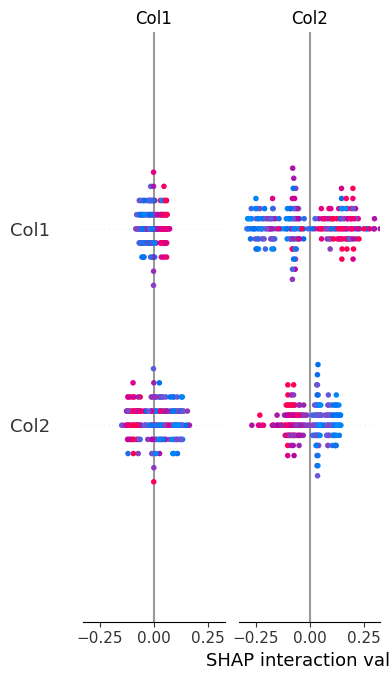

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=X_train.columns, class_inds=1)

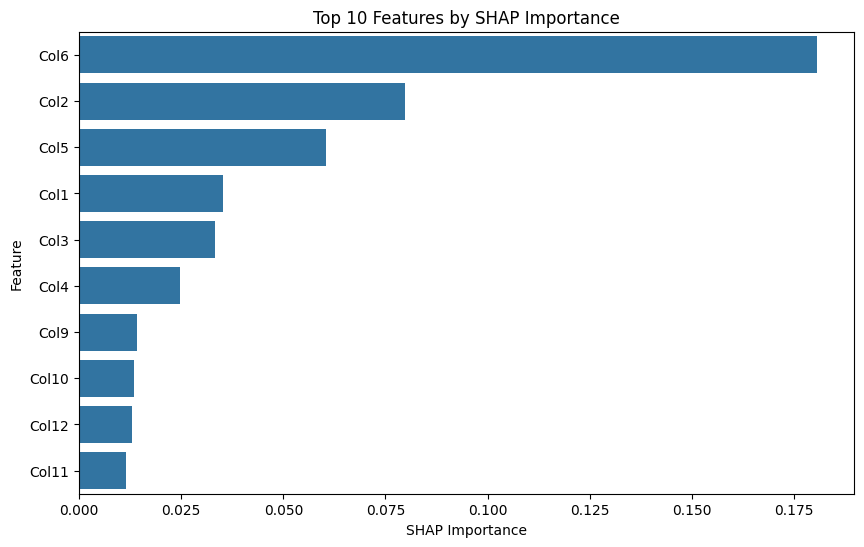

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='SHAP Importance', y='Feature', data=shap_importance.head(10))
plt.title("Top 10 Features by SHAP Importance")
plt.show()

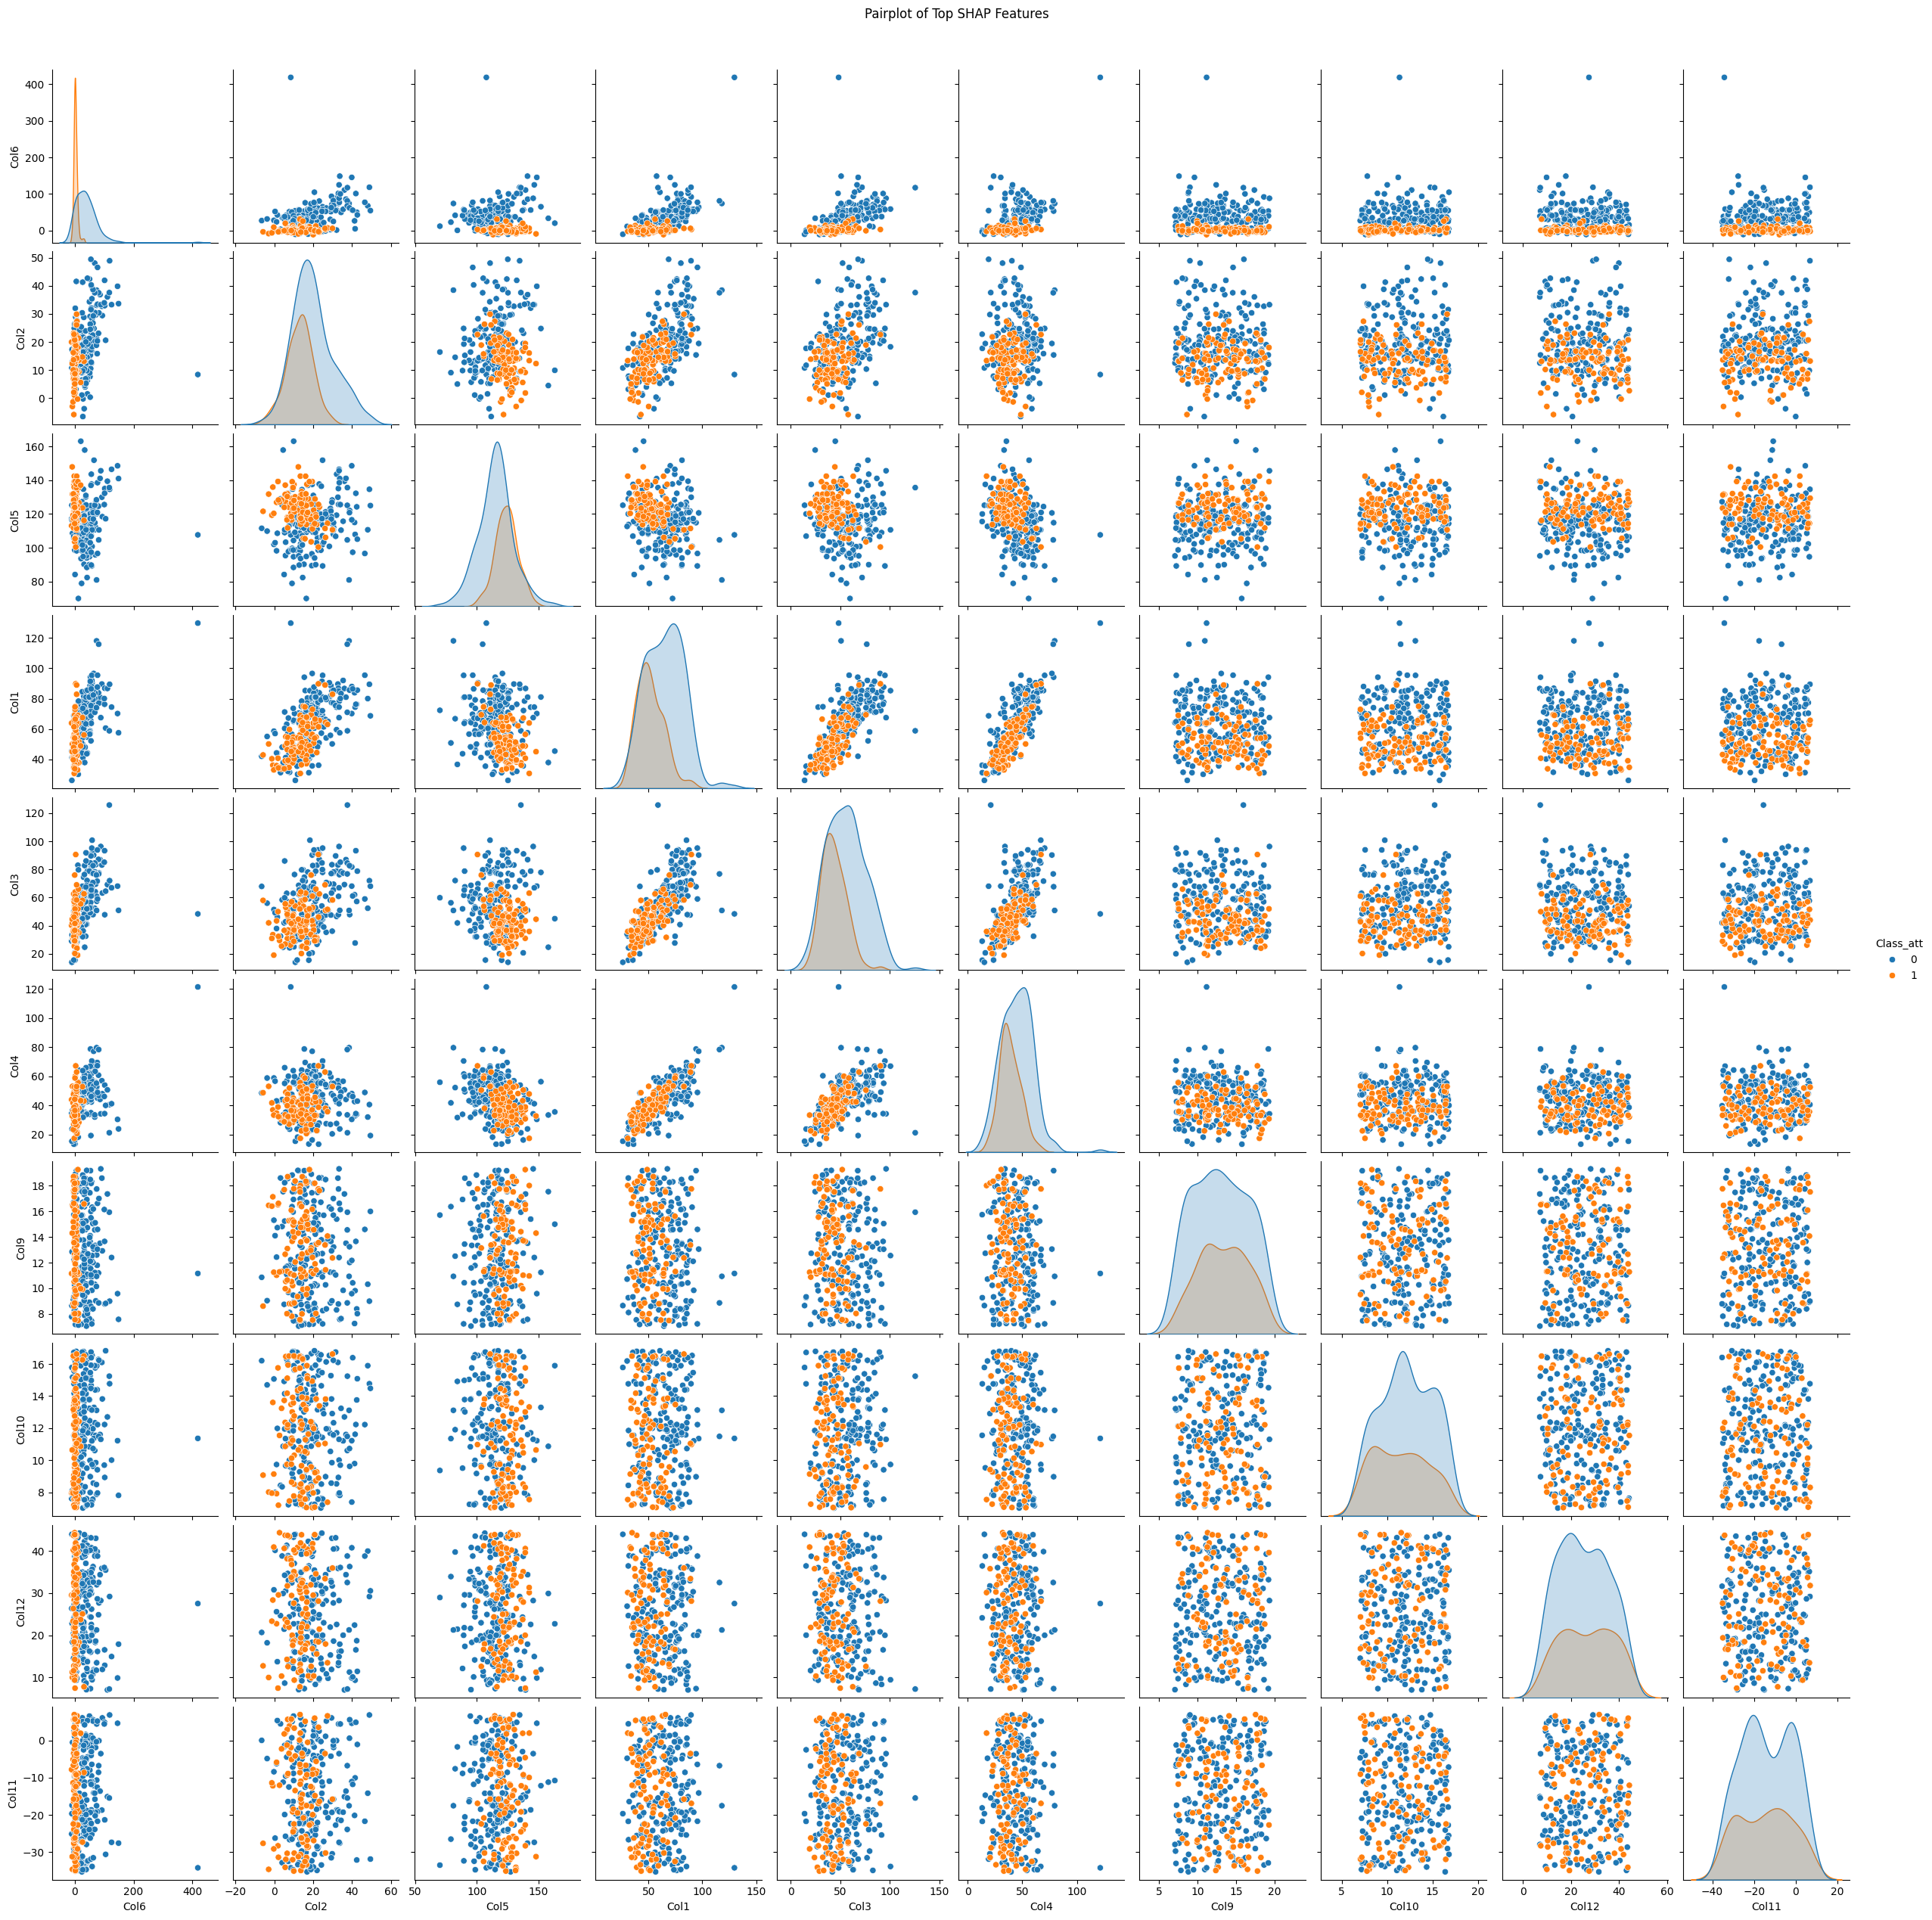

In [ ]:
sns.pairplot(df[top_features.tolist() + ['Class_att']], hue='Class_att')
plt.suptitle("Pairplot of Top SHAP Features", y=1.02)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Dataset_spine.csv")

# Display basic info
print(df.head())
print("\nDataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())

        Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  \
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal   
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal   
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal   
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal   
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal   

                                         Unnamed: 13  
0                                                NaN  
1                 

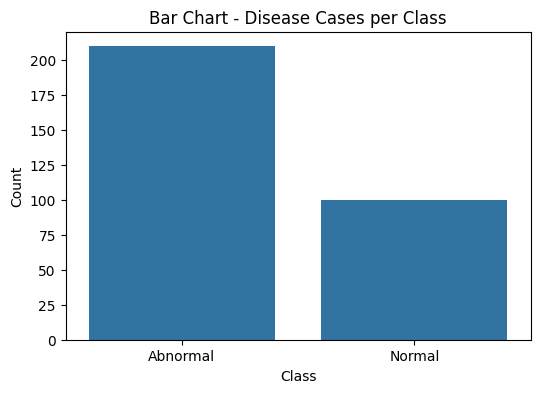

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class_att')   # replace 'class' with a categorical column if needed
plt.title("Bar Chart - Disease Cases per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

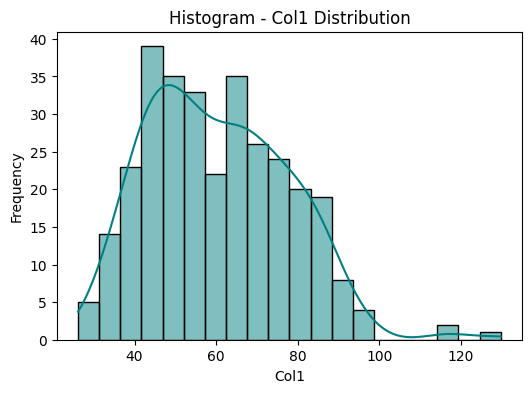

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Col1'], bins=20, kde=True, color='teal')  # replace 'age' with an available numeric column
plt.title("Histogram - Col1 Distribution")
plt.xlabel("Col1")
plt.ylabel("Frequency")
plt.show()

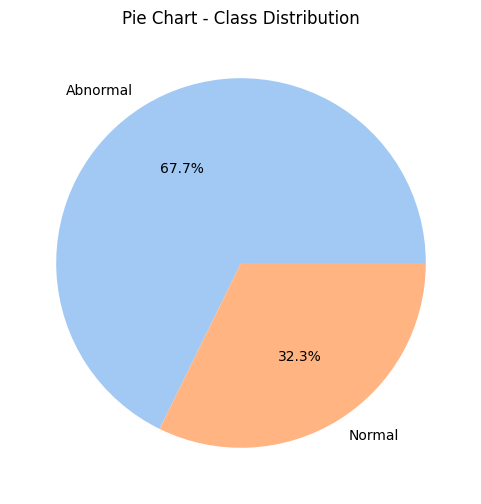

In [ ]:
plt.figure(figsize=(6,6))
df['Class_att'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Pie Chart - Class Distribution")
plt.ylabel("")
plt.show()

/tmp/ipython-input-154491108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Class_att', y='Col1', palette='Set2')  # replace 'age' with another numeric column if needed


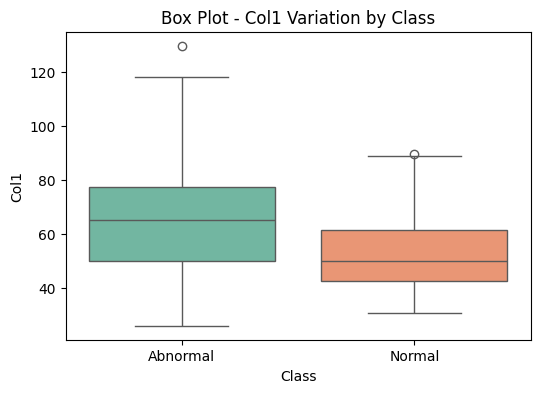

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Class_att', y='Col1', palette='Set2')  # replace 'age' with another numeric column if needed
plt.title("Box Plot - Col1 Variation by Class")
plt.xlabel("Class")
plt.ylabel("Col1")
plt.show()

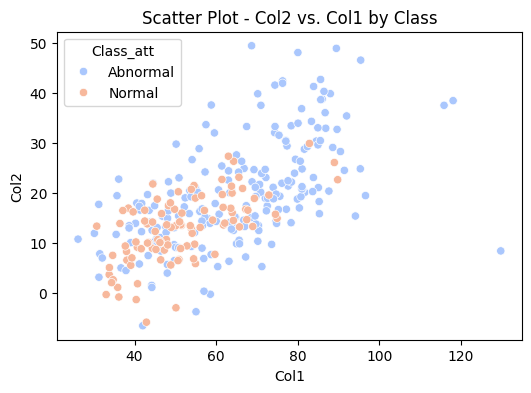

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Col1', y='Col2', hue='Class_att', palette='coolwarm')  # replace with actual columns
plt.title("Scatter Plot - Col2 vs. Col1 by Class")
plt.xlabel("Col1")
plt.ylabel("Col2")
plt.show()

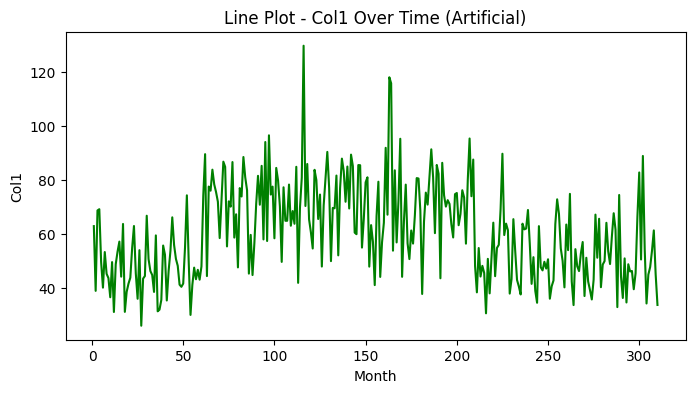

In [ ]:
# Example: assuming you have a "month" column or create one artificially
df['month'] = pd.Series(range(1, len(df)+1))  # dummy variable if no time column

plt.figure(figsize=(8,4))
sns.lineplot(data=df, x='month', y='Col1', color='green')  # replace 'age' with relevant column
plt.title("Line Plot - Col1 Over Time (Artificial)")
plt.xlabel("Month")
plt.ylabel("Col1")
plt.show()

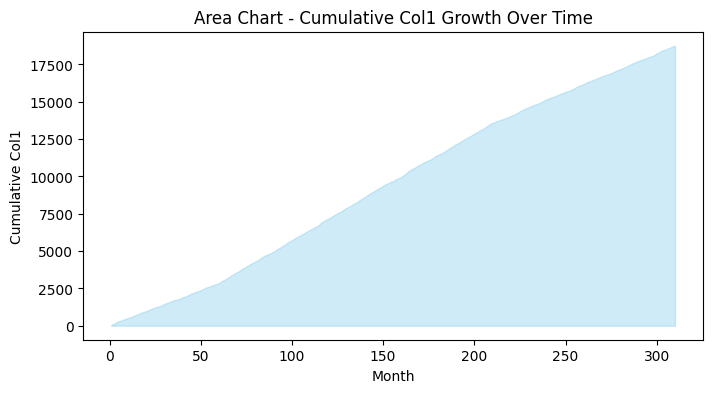

In [ ]:
plt.figure(figsize=(8,4))
plt.fill_between(df['month'], df['Col1'].cumsum(), color='skyblue', alpha=0.4)  # cumulative example
plt.title("Area Chart - Cumulative Col1 Growth Over Time")
plt.xlabel("Month")
plt.ylabel("Cumulative Col1")
plt.show()

In [ ]:
df.describe()

Col1        Col2        Col3        Col4        Col5        Col6  \
count  310.000000  310.000000  310.000000  310.000000  310.000000  310.000000   
mean    60.496653   17.542822   51.930930   42.953831  117.920655   26.296694   
std     17.236520   10.008330   18.554064   13.423102   13.317377   37.559027   
min     26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179   
25%     46.430294   10.667069   37.000000   33.347122  110.709196    1.603727   
50%     58.691038   16.357689   49.562398   42.404912  118.268178   11.767934   
75%     72.877696   22.120395   63.000000   52.695888  125.467674   41.287352   
max    129.834041   49.431864  125.742385  121.429566  163.071041  418.543082   

             Col7        Col8        Col9       Col10       Col11       Col12  \
count  310.000000  310.000000  310.000000  310.000000  310.000000  310.000000   
mean     0.472979   21.321526   13.064511   11.933317  -14.053139   25.645981   
std      0.285787    8.639423    3.399713    2.893265   12.225582   10.450558   
min      0.003220    7.027000    7.037800    7.030600  -35.287375    7.007900   
25%      0.224367   13.054400   10.417800    9.541140  -24.289522   17.189075   
50%      0.475989   21.907150   12.938450   11.953835  -14.622856   24.931950   
75%      0.704846   28.954075   15.889525   14.371810   -3.497094   33.979600   
max      0.998827   36.743900   19.324000   16.821080    6.972071   44.341200   

            month  
count  310.000000  
mean   155.500000  
std     89.633513  
min      1.000000  
25%     78.250000  
50%    155.500000  
75%    232.750000  
max    310.000000

In [ ]:
df_sample = df.sample(100)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Dataset_spine.csv")

# Encode target variable
le = LabelEncoder()
df['Class_att'] = le.fit_transform(df['Class_att'])  # replace 'class' with actual target column if different

# Separate features and target, dropping the non-numeric column
X = df.drop(['Class_att', 'Unnamed: 13'], axis=1)
y = df['Class_att']

# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Bernoulli)": BernoulliNB(),
    # "Naive Bayes (Multinomial)": MultinomialNB(), # Removed as it cannot handle negative values
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append([name, acc, prec, rec, f1, auc])

    print(f"\n=== {name} ===")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-Score :", f1)
    print("AUC      :", auc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


=== Logistic Regression ===
Accuracy : 0.9032258064516129
Precision: 0.8
Recall   : 0.8333333333333334
F1-Score : 0.8163265306122449
AUC      : 0.9510869565217391
Confusion Matrix:
 [[64  5]
 [ 4 20]]

=== Decision Tree ===
Accuracy : 0.7849462365591398
Precision: 0.5833333333333334
Recall   : 0.5833333333333334
F1-Score : 0.5833333333333334
AUC      : 0.7192028985507247
Confusion Matrix:
 [[59 10]
 [10 14]]

=== KNN ===
Accuracy : 0.7956989247311828
Precision: 0.5806451612903226
Recall   : 0.75
F1-Score : 0.6545454545454545
AUC      : 0.8523550724637682
Confusion Matrix:
 [[56 13]
 [ 6 18]]

=== Naive Bayes (Gaussian) ===
Accuracy : 0.7956989247311828
Precision: 0.5675675675675675
Recall   : 0.875
F1-Score : 0.6885245901639344
AUC      : 0.8369565217391304
Confusion Matrix:
 [[53 16]
 [ 3 21]]

=== Naive Bayes (Bernoulli) ===
Accuracy : 0.7204301075268817
Precision: 0.47058823529411764
Recall   : 0.6666666666666666
F1-Score : 0.5517241379310345
AUC      : 0.8348429951690822
Confusion


===== Model Comparison Table =====
                     Model  Accuracy  Precision    Recall  F1-Score       AUC
0      Logistic Regression  0.903226   0.800000  0.833333  0.816327  0.951087
5                      SVM  0.827957   0.666667  0.666667  0.666667  0.891908
3   Naive Bayes (Gaussian)  0.795699   0.567568  0.875000  0.688525  0.836957
2                      KNN  0.795699   0.580645  0.750000  0.654545  0.852355
1            Decision Tree  0.784946   0.583333  0.583333  0.583333  0.719203
4  Naive Bayes (Bernoulli)  0.720430   0.470588  0.666667  0.551724  0.834843


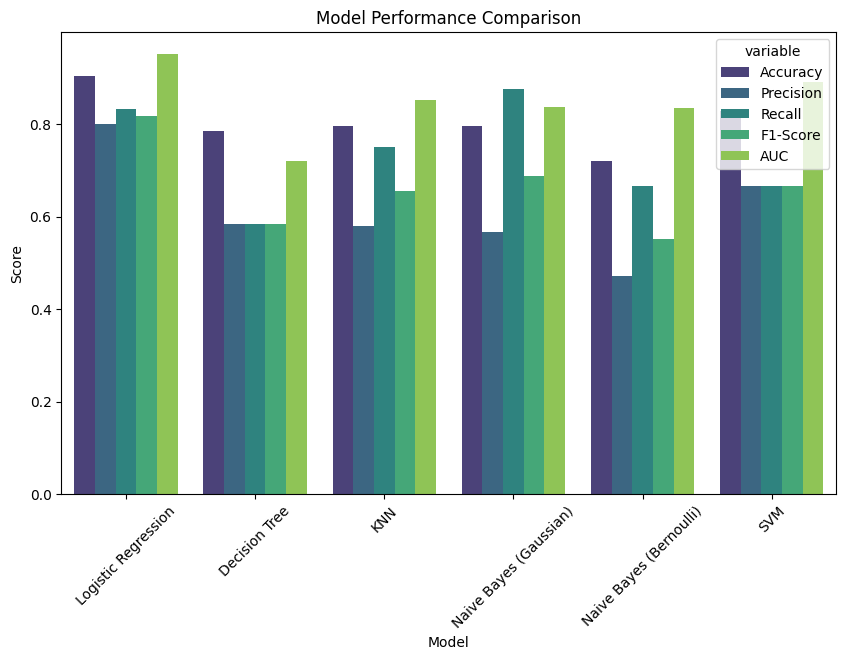

In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
print("\n===== Model Comparison Table =====")
print(results_df.sort_values(by="Accuracy", ascending=False))

# Visualize comparison
plt.figure(figsize=(10,6))
sns.barplot(data=results_df.melt(id_vars="Model", value_vars=["Accuracy","Precision","Recall","F1-Score","AUC"]),
            x="Model", y="value", hue="variable", palette="viridis")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.show()

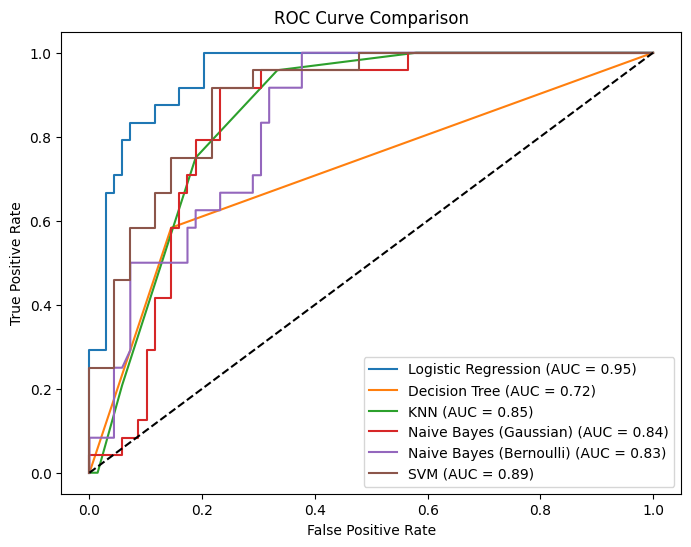

In [ ]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        y_prob = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/Dataset_spine.csv")

# Encode target column if categorical
le = LabelEncoder()
df['Class_att'] = le.fit_transform(df['Class_att'])   # replace 'class' with actual target column if needed

# Separate features and target
X = df.drop(['Class_att', 'Unnamed: 13'], axis=1)
y = df['Class_att']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,
    AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
)

# External libraries for advanced boosting
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

ModuleNotFoundError: No module named 'catboost'

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.2 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,
    AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
)

# External libraries for advanced boosting
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier # Import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


models = {
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, verbose=0, random_state=42),
}

# Define base models for stacking and voting
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('lr', LogisticRegression(max_iter=1000))
]

# Add stacking and voting ensemble
stacking = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(), cv=5)
voting = VotingClassifier(estimators=base_learners, voting='soft')

models["Stacking"] = stacking
models["Voting"] = voting

In [ ]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

    print(f"\n=== {name} ===")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-Score :", f1)
    print("Confusion Matrix:\n", cm)


=== Bagging ===
Accuracy : 0.8279569892473119
Precision: 0.7
Recall   : 0.5833333333333334
F1-Score : 0.6363636363636364
Confusion Matrix:
 [[63  6]
 [10 14]]

=== Random Forest ===
Accuracy : 0.7956989247311828
Precision: 0.6190476190476191
Recall   : 0.5416666666666666
F1-Score : 0.5777777777777777
Confusion Matrix:
 [[61  8]
 [11 13]]

=== Extra Trees ===
Accuracy : 0.7956989247311828
Precision: 0.6190476190476191
Recall   : 0.5416666666666666
F1-Score : 0.5777777777777777
Confusion Matrix:
 [[61  8]
 [11 13]]

=== AdaBoost ===
Accuracy : 0.8064516129032258
Precision: 0.625
Recall   : 0.625
F1-Score : 0.625
Confusion Matrix:
 [[60  9]
 [ 9 15]]

=== Gradient Boosting ===
Accuracy : 0.8064516129032258
Precision: 0.6153846153846154
Recall   : 0.6666666666666666
F1-Score : 0.64
Confusion Matrix:
 [[59 10]
 [ 8 16]]

=== XGBoost ===
Accuracy : 0.8279569892473119
Precision: 0.6666666666666666
Recall   : 0.6666666666666666
F1-Score : 0.6666666666666666
Confusion Matrix:
 [[61  8]
 [ 8 16

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:04:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== CatBoost ===
Accuracy : 0.8494623655913979
Precision: 0.6666666666666666
Recall   : 0.8333333333333334
F1-Score : 0.7407407407407407
Confusion Matrix:
 [[59 10]
 [ 4 20]]

=== Stacking ===
Accuracy : 0.8709677419354839
Precision: 0.7307692307692307
Recall   : 0.7916666666666666
F1-Score : 0.76
Confusion Matrix:
 [[62  7]
 [ 5 19]]

=== Voting ===
Accuracy : 0.8494623655913979
Precision: 0.6785714285714286
Recall   : 0.7916666666666666
F1-Score : 0.7307692307692307
Confusion Matrix:
 [[60  9]
 [ 5 19]]



===== Ensemble Model Comparison =====
               Model  Accuracy  Precision    Recall  F1-Score
8           Stacking  0.870968   0.730769  0.791667  0.760000
7           CatBoost  0.849462   0.666667  0.833333  0.740741
9             Voting  0.849462   0.678571  0.791667  0.730769
0            Bagging  0.827957   0.700000  0.583333  0.636364
6           LightGBM  0.827957   0.681818  0.625000  0.652174
5            XGBoost  0.827957   0.666667  0.666667  0.666667
4  Gradient Boosting  0.806452   0.615385  0.666667  0.640000
3           AdaBoost  0.806452   0.625000  0.625000  0.625000
1      Random Forest  0.795699   0.619048  0.541667  0.577778
2        Extra Trees  0.795699   0.619048  0.541667  0.577778


/tmp/ipython-input-3789231015.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Accuracy", palette="coolwarm")


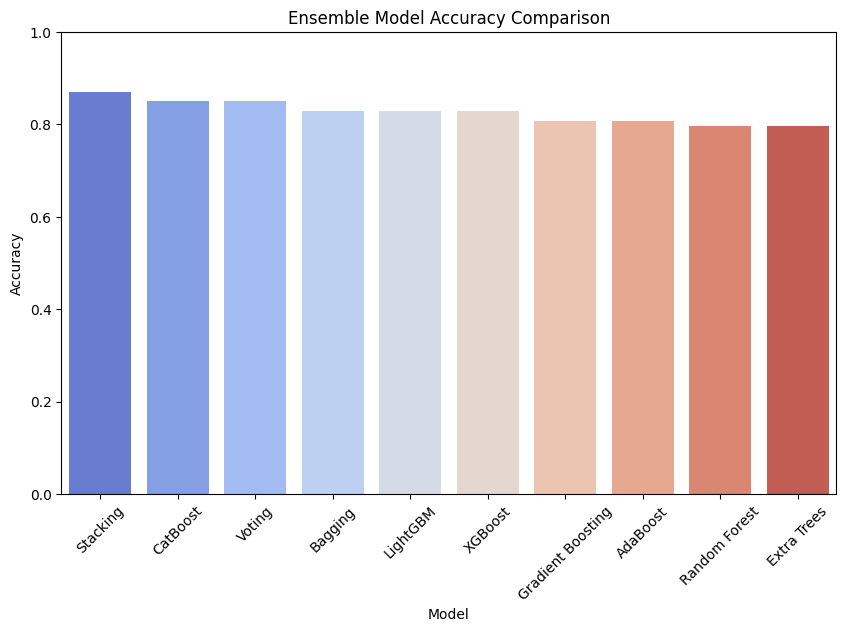

In [ ]:
# Create a DataFrame for comparison
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("\n===== Ensemble Model Comparison =====")
print(results_df)

# Visualization: Accuracy Comparison
plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="coolwarm")
plt.title("Ensemble Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()

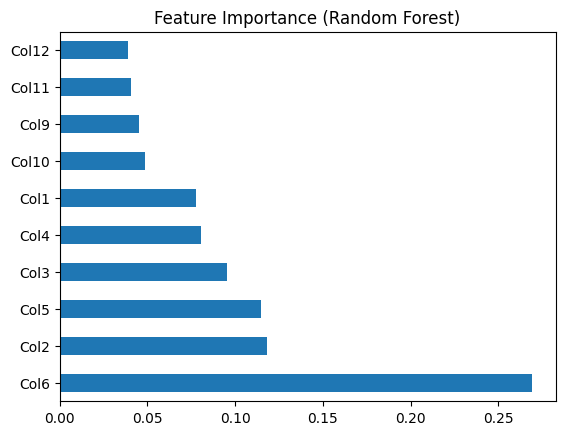

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier().fit(X_train, y_train)
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load dataset
df = pd.read_csv("/content/Dataset_spine.csv")

# Encode target
le = LabelEncoder()
df['Class_att'] = le.fit_transform(df['Class_att'])  # replace 'class' with your label column if different

# Separate features and labels
X = df.drop(['Class_att', 'Unnamed: 13'], axis=1)
y = df['Class_att']

# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
def build_fnn(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def build_cnn(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(32, 3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def build_lstm(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Reshape for CNN/LSTM (samples, timesteps, features)
X_train_seq = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_seq  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build models
fnn = build_fnn(X_train.shape[1])
cnn = build_cnn((X_train.shape[1], 1))
lstm = build_lstm((X_train.shape[1], 1))

# Early stopping for efficiency
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train each model
history_fnn = fnn.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=[es], verbose=0)
history_cnn = cnn.fit(X_train_seq, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=[es], verbose=0)
history_lstm = lstm.fit(X_train_seq, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=[es], verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def evaluate_model(model, X_t, y_t, name):
    y_pred_prob = model.predict(X_t).ravel()
    y_pred = (y_pred_prob > 0.5).astype(int)

    acc = accuracy_score(y_t, y_pred)
    prec = precision_score(y_t, y_pred)
    rec = recall_score(y_t, y_pred)
    f1 = f1_score(y_t, y_pred)
    auc = roc_auc_score(y_t, y_pred_prob)
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    return [name, acc, prec, rec, f1, auc]

results = []
results.append(evaluate_model(fnn, X_test, y_test, "FNN / DNN"))
results.append(evaluate_model(cnn, X_test_seq, y_test, "CNN"))
results.append(evaluate_model(lstm, X_test_seq, y_test, "LSTM"))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

=== FNN / DNN ===
Accuracy: 0.8387
Precision: 0.7500
Recall: 0.6667
F1-Score: 0.7059
AUC: 0.9015
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

=== CNN ===
Accuracy: 0.7581
Precision: 0.6000
Recall: 0.5000
F1-Score: 0.5455
AUC: 0.8270


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step

=== LSTM ===
Accuracy: 0.6290
Precision: 0.3529
Recall: 0.3333
F1-Score: 0.3429
AUC: 0.6919


In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
print("\n===== Deep Learning Model Comparison =====")
print(results_df)


===== Deep Learning Model Comparison =====
       Model  Accuracy  Precision    Recall  F1-Score       AUC
0  FNN / DNN  0.838710   0.750000  0.666667  0.705882  0.901515
1        CNN  0.758065   0.600000  0.500000  0.545455  0.827020
2       LSTM  0.629032   0.352941  0.333333  0.342857  0.691919


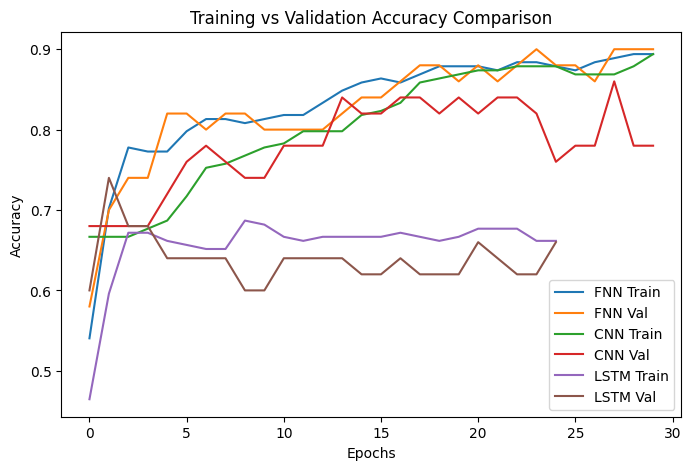

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history_fnn.history['accuracy'], label='FNN Train')
plt.plot(history_fnn.history['val_accuracy'], label='FNN Val')
plt.plot(history_cnn.history['accuracy'], label='CNN Train')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val')
plt.plot(history_lstm.history['accuracy'], label='LSTM Train')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val')
plt.title("Training vs Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


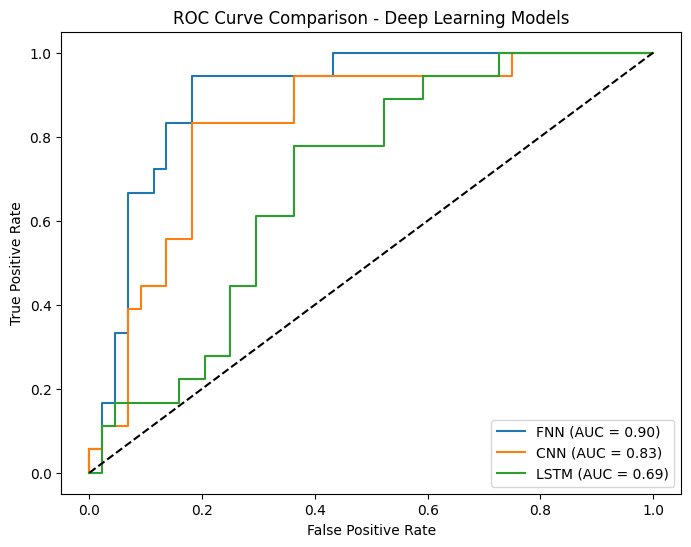

In [ ]:
plt.figure(figsize=(8,6))
for model, X_t, name in [(fnn, X_test, "FNN"), (cnn, X_test_seq, "CNN"), (lstm, X_test_seq, "LSTM")]:
    y_prob = model.predict(X_t).ravel()
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve Comparison - Deep Learning Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()